In [11]:
import numpy as np

In [38]:
AB = np.array([200, 50, 0, 0])
OPS = np.array([0.9, 0.4, 0.0, 0.0])
Pred = np.array([0.95, 0.35, 0.5, 0.3])
WRMSE = 0

In [39]:
for i in range(4):
    a = np.sqrt((((OPS[i]-Pred[i])**2)*AB[i]) / np.sum(AB))
    WRMSE += a
print('WRMSE : ', np.round(WRMSE, 4))

WRMSE :  0.0671


In [21]:
class Metrics():
    def __init__(self, ops, pred, ab):
        self.ops = ops
        self.pred = pred
        self.ab = ab

In [26]:
def out_wrmse(self):
    wrmse_valse = \
    np.sqrt((((self.ops-self.pred)**2) * self.ab) / np.sum(self.ab))
    print('WRMSE_i : ', np.round(wrmse_valse, 4))
    wrmse_total = np.sum(wrmse_valse)
    wrmse_total = np.round(wrmse_total, 4)
    return wrmse_total

Metrics.wrmse = out_wrmse

In [27]:
C_wrmse = Metrics(OPS, Pred, AB)
print("Total value of WRMSE : ", C_wrmse.wrmse())

WRMSE_i :  [0.0447 0.0224 0.     0.    ]
Total value of WRMSE :  0.0671


# EDA

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import platform
import warnings
warnings.filterwarnings('ignore')

In [48]:
preseason_df = pd.read_csv('data/Pre_Season_Batter.csv')
regular_season_df = pd.read_csv('data/Regular_Season_Batter.csv')

In [47]:
print('preseason_df.shape : ', preseason_df.shape)
print('regular_season_df.shape : ', regular_season_df.shape)

preseason_df.shape :  (1393, 29)
regular_season_df.shape :  (2454, 29)


In [50]:
preseason_df.describe()

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


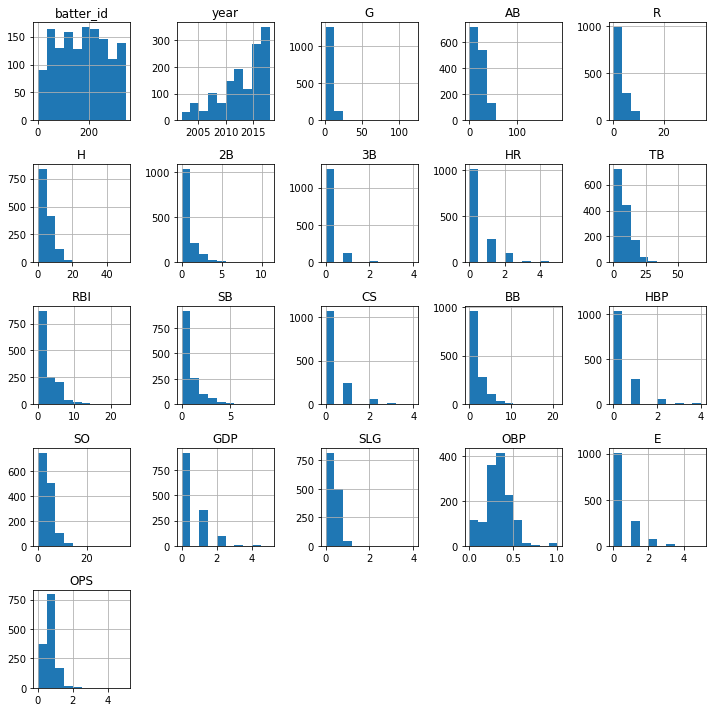

In [52]:
preseason_df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

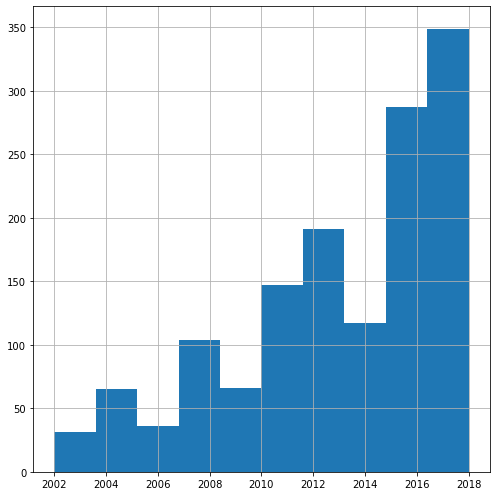

In [54]:
preseason_df['year'].hist(figsize=(7,7))
plt.tight_layout()
plt.show()

In [55]:
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')

In [58]:
pd.concat([regular_count,
          preseason_count],
         axis = 1).transpose().loc[:, 2000:]

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,20.0,32.0,43.0,54.0,68.0,73.0,85.0,98.0,115.0,124.0,130.0,151.0,174.0,194.0,186.0,207.0,213.0,217.0,227.0
preseason,NaN,NaN,12.0,19.0,28.0,37.0,36.0,43.0,61.0,66.0,72.0,75.0,87.0,104.0,117.0,134.0,153.0,167.0,182.0


## Abalone 데이터를 사용한 상관관계 분석

In [59]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [64]:
correlation = df_abalone['Rings'].corr(df_abalone['Height'])
print("{} and {} - corr : {}".format('Rings','Height',round(correlation,3)))

Rings and Height - corr : 0.557


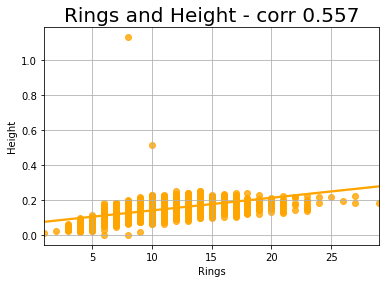

In [65]:
sns.regplot(x = df_abalone['Rings'], y = df_abalone['Height'],
           color = 'orange')

plt.title('{} and {} - corr {}'.format('Rings','Height',np.round(correlation,3)),
         fontsize=20)

plt.grid()
plt.show()

In [66]:
def corr_abalone(var_name1, var_name2):
    corr = df_abalone[var_name1].corr(df_abalone[var_name2])
    print("{} and {} - corr : {}".format(var_name1,var_name2,round(corr,3)))
    return corr

In [67]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [69]:
df_abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [70]:
len(df_abalone.columns)

9

In [72]:
df_abalone.columns[8]

'Rings'

In [73]:
for i in range(1, len(df_abalone.columns)-1):
    corr_abalone(df_abalone.columns[8], df_abalone.columns[i])

Rings and Length - corr : 0.557
Rings and Diameter - corr : 0.575
Rings and Height - corr : 0.557
Rings and Whole weight - corr : 0.54
Rings and Shucked weight - corr : 0.421
Rings and Viscera weight - corr : 0.504
Rings and Shell weight - corr : 0.628


Rings and Shell weight - corr : 0.628


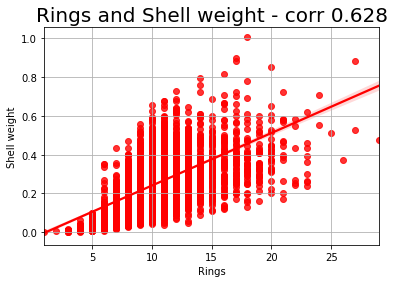

In [80]:
corr_val = corr_abalone(df_abalone.columns[8], df_abalone.columns[7])

sns.regplot(x = df_abalone['Rings'],
           y = df_abalone['Shell weight'],
           color = 'red')

plt.title('{} and {} - corr {}'.format('Rings','Shell weight',np.round(corr_val,3)),
         fontsize=20)

plt.grid()
plt.show()